Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

#Strojno učenje
<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

Ak. god. 2015./2016.

#Laboratorijska vježba 1: Procjena parametara i Bayesov klasifikator

(c) 2015 Jan Šnajder

*Verzija 0.3*

Objavljeno: **27. listopada 2015.**<br>
Rok za predaju: **1. studenog 2015.**


Vježba se sastoji od više zadataka grupiranih u tri teme. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg koda te evaluiranja ćelija. Odgovore na pitanja **nemojte pisati** u bilježnicu koju ćete demonstrirati asistentu (kako ih pri predaji ne bi samo čitali).

Molim vas, osigurajte se da u potpunosti **razumijete** kod koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta preinačiti i ponovno evaluirati Vaš kod. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Stoga se nemojte ograničiti samo na to da riješite zadatak, već slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [135]:
# Učitaj osnovne biblioteke...
import scipy as sp
import matplotlib.pyplot as plt
from scipy import special
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 1. Procjena parametara

### 1.1

Definirajte funkciju izglednosti $\mathcal{L}(\mu|\mathcal{D})$ za skup $\mathcal{D}=\{x^{(i)}\}_{i=1}^N$ Bernoullijevih varijabli. Neka od $N$ varijabli njih $m$ ima vrijednost 1 (npr. od $N$ bacanja novčića, $m$ puta smo dobili glavu). Definirajte funkciju izglednosti tako da je parametrizirana s $N$ i $m$, dakle definirajte funkciju $\mathcal{L}(\mu|N,m)$. 

In [13]:
def L(mu, m, N):
    return ((mu**m) * ((1-mu)**(N-m)))

### 1.2

Prikažite funkciju $\mathcal{L}(\mu|N,m)$ za (1) $N=10$ i $m=1,2,5,9$ te za (2) $N=100$ i $m=1,10,50,90$ (dva zasebna grafikona).

**Q:** Koja vrijednost odgovara ML-procjenama i zašto?

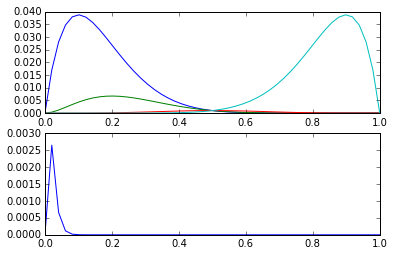

In [14]:
xs = linspace(0,1)
plt.subplot(2,1,1)
for m in [1,2,5,9]:
    plt.plot(xs, L(xs, m, 10))
    
plt.subplot(2,1,2)
for m in [1,10,50,90]:
    plt.plot(xs, L(xs, m, 100))


### 1.3

Prikažite funkciju $\mathcal{L}(\mu|N,m)$ za $N=10$ i $m=\{0,9\}$.

**Q:** Koja je ML-procjena za $\mu$ i što je problem s takvom procjenom u ovome slučaju?

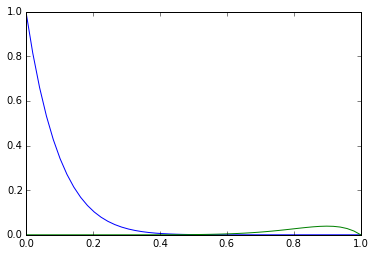

In [15]:
for m in [0,9]:
    plt.plot(xs, L(xs, m, 10))

### 1.4

Prikažite beta-distribuciju $B(\mu|\alpha,\beta)$ za različite kombinacije parametara $\alpha$ i $\beta$, uključivo $\alpha=\beta=1$ te $\alpha=\beta=2$.

**Q:** Koje parametere biste odabrali za modeliranje apriornog znanja o parametru $\mu$ za novčić za koji mislite da je "donekle pravedan, ali malo češće pada na glavu"? Koje biste parametre odabrali za novčić za koji držite da je posve pravedan? Zašto uopće koristimo beta-distribuciju, a ne neku drugu?

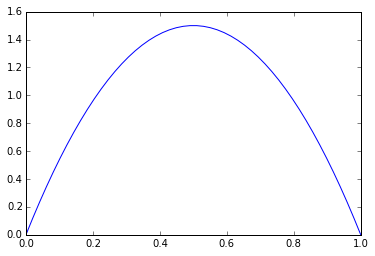

In [11]:
from scipy import stats
xs = linspace(0,1)
plt.plot(xs, stats.beta.pdf(xs, 2,2))

### 1.5

Definirajte funkciju za izračun zajedničke vjerojatnosti $P(\mu,\mathcal{D}) = P(\mathcal{D}|\mu) \cdot P(\mu|\alpha,\beta)$ te prikažite tu funkciju za gornje kombinacije parametara $N$ i $m$ i neke odabrane $\alpha$ i $\beta$. 

***Q***: Koje vrijednosti odgovaraju MAP-procjeni za $\mu$? Usporedite ih sa ML-procjenama.

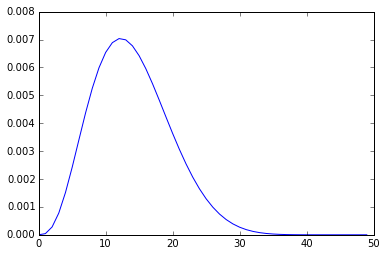

In [19]:
def P(mu, m, N, a, b):
    return L(mu, m, N) * stats.beta.pdf(mu, a, b)

xs = linspace(0,1)
plt.plot(P(xs, 2, 10, 2, 2)) ;

### 1.6

Za $N=10$ i $m=1$, na jednome grafikonu prikažite sve tri distribucije: $P(\mu,\mathcal{D})$, $P(\mu|\alpha,\beta)$ i $\mathcal{L}(\mu|\mathcal{D})$.

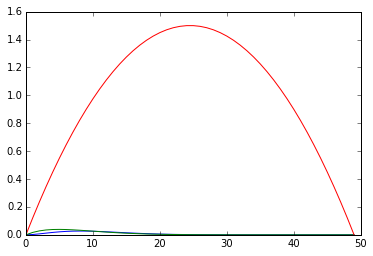

In [38]:
xs = linspace(0,1)
plt.plot(P(xs, 1, 10, 2, 2)); #(mi, D)
plt.plot(L(xs, 1, 10)); #L

plt.plot(stats.beta.pdf(xs, 2, 2))

### 1.7

Pročitajte [ove](http://scikit-learn.org/stable/datasets/) upute o učitavanju oglednih skupova podataka u SciPy. Učitajte skup podataka *Iris*. Taj skup sadrži $n=4$ značajke i $K=3$ klase. Odaberite jednu klasu i odaberite sve primjere iz te klase, dok ostale primjere zanemarite (u nastavku radite samo s primjerima iz te jedne klase). Vizualizirajte podatke tako da načinite 2D-prikaze za svaki par značajki (šest grafikona; za prikaz je najjednostavnije koristiti funkciju [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter)).

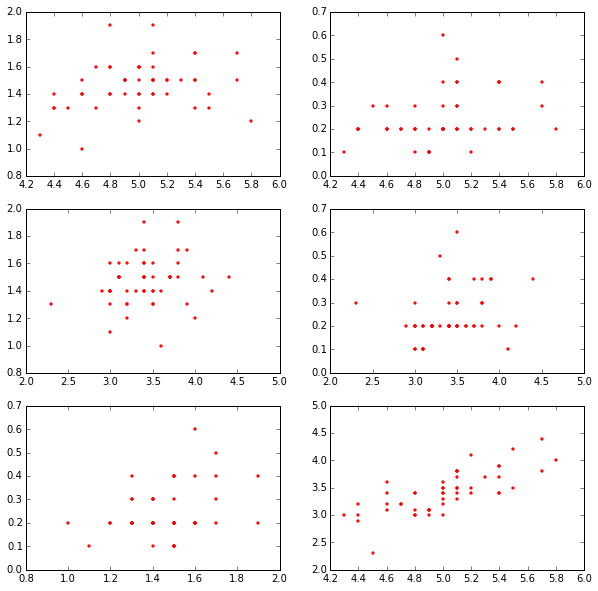

In [63]:
from sklearn import datasets
iris = datasets.load_iris()

c0 = iris.data[iris.target == 0]
fig = plt.figure(figsize=(10,10))

k = 0
for i in range(3):
    for j in range(i+1, 4):
        ax1 = fig.add_subplot(3,2,k)
        k += 1
        ax1.scatter(c0[:, i], c0[:, j], marker='.', color='red')


### 1.8

Pogledajte opis modul [`stats`](http://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html) te proučite funkciju [`norm`](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.norm.html#scipy.stats.norm). Implementirajte funkciju log-izglednosti za parametre $\mu$ i $\sigma^2$ normalne distribucije.

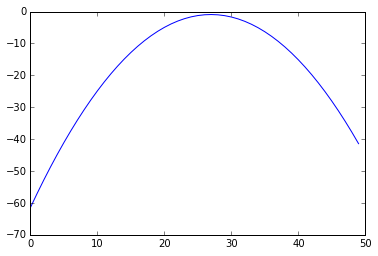

In [81]:
def lognorm(mu, var):
    return np.log(sp.stats.norm.pdf(mu, var**2));

x = linspace(-10, 10);
plt.plot(lognorm(x, 1));

### 1.9

Izračunajte ML-procjene za $(\mu, \sigma^2)$ za svaku od $n=4$ značajki iz skupa *Iris*. Ispišite log-izglednosti tih ML-procjena. 

**Q:** Možete li, na temelju dobivenih log-izglednosti, zaključiti koja se značajka najbolje pokorava normalnoj distribuciji? 

In [141]:
from sklearn import datasets
iris = datasets.load_iris()

def mllogl(dataset):
    N = len(dataset)
    mjuml = np.sum(dataset)/N
    sigmaml = np.sum(np.power(dataset - mjuml,2))/N
    logl =-N/2*np.log(2*np.pi)-N*np.log(sigmaml)-np.sum(np.power(dataset-mjuml,2)) / (2*sigmaml*sigmaml)
    return mjuml,sigmaml,logl

for x in range(4):
    print mllogl(iris.data[:,x])

(5.8433333333333337, 0.6811222222222223, -190.35114904345357)
(3.0540000000000003, 0.18675066666666668, -287.74863924889439)
(3.7586666666666662, 3.092424888888889, -331.43692268273105)
(1.1986666666666668, 0.57853155555555547, -185.39001582824898)


### 1.10

Proučite funkciju [`pearsonr`](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.mstats.pearsonr.html) za izračun Pearsonovog koeficijenta korelacije. Izračunajte koeficijente korelacije između svih četiri značajki u skupu *Iris*. 

In [107]:
cor = np.empty((4,4));
for i in range(4):
    for j in range(4):
        cor[i][j] = sp.stats.mstats.pearsonr(iris.data[:, i], iris.data[:, j])[0]
        
print(cor)

[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


### 1.11

Proučite funkciju [`cov`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html) te izračunajte ML-procjenu za kovarijacijsku matricu za skup *Iris*. Usporedite pristranu i nepristranu procjenu. Pokažite da se razlika smanjuje s brojem primjera (npr. isprobajte za $N/4$ i $N/2$ i $N$ primjera).

In [113]:
sp.cov(iris.data.transpose())

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

### 1.12

Proučite funkciju [`multivariate_normal`](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.multivariate_normal.html#scipy.stats.multivariate_normal). Definirajte funkciju koja vraća funkciju gustoće $P(x_1,x_2)$ za odabrane dvije značajke. Nacrtajte grafikone kontura (funkcija [`contour`](https://scipy-lectures.github.io/intro/matplotlib/matplotlib.html#contour-plots)) za svih šest parova značajki.

ValueError: x and y must have same first dimension

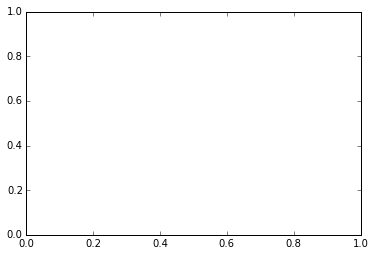

In [163]:
from scipy.stats import multivariate_normal
feature1 = iris.data[:, 0];
feature2 = iris.data[:, 0];

def P(x1, x2):
    return multivariate_normal(x1, x2)

x = linspace(10, 10)
plt.plot(x, P(feature1, feature2))

# 2. Bayesov klasifikator za diskretne značajke

### 2.1

Za demonstraciju rada Bayesovog klasifikatora sa diskretnim značajkama treba nam skup primjera sa diskretnim značajkama i oznakama klase. Jedan takav ogledni skup podataka jest *digits*:

In [145]:
from sklearn.datasets import load_digits

digits = load_digits()

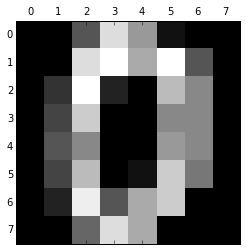

In [146]:
gray() 
matshow(digits.images[0])
show();

Svaki primjer je matrica dimenzija $8\times 8$:

In [147]:
shape(digits.images[0])

(8, 8)

In [148]:
x = digits.images[0]

Ako na ovom skupu želimo trenirati Bernoullijev naivni Bayesov klasifikator, značajke trebamo binarizirati. Proučite funkciju [`binarize`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.binarize.html) i binarizirajte skup podataka.

In [153]:
from sklearn import preprocessing
for x in digits.images:
    print preprocessing.binarize(x)

 [[ 0.  0.  1.  1.  1.  1.  0.  0.]
 [ 0.  0.  1.  1.  1.  1.  1.  0.]
 [ 0.  1.  1.  1.  0.  1.  1.  0.]
 [ 0.  1.  1.  0.  0.  1.  1.  0.]
 [ 0.  1.  1.  0.  0.  1.  1.  0.]
 [ 0.  1.  1.  0.  1.  1.  1.  0.]
 [ 0.  1.  1.  1.  1.  1.  0.  0.]
 [ 0.  0.  1.  1.  1.  0.  0.  0.]]
[[ 0.  0.  0.  1.  1.  1.  0.  0.]
 [ 0.  0.  0.  1.  1.  1.  0.  0.]
 [ 0.  0.  1.  1.  1.  1.  0.  0.]
 [ 0.  1.  1.  1.  1.  1.  0.  0.]
 [ 0.  0.  1.  1.  1.  1.  0.  0.]
 [ 0.  0.  1.  1.  1.  1.  0.  0.]
 [ 0.  0.  1.  1.  1.  1.  0.  0.]
 [ 0.  0.  0.  1.  1.  1.  0.  0.]]
[[ 0.  0.  0.  1.  1.  1.  0.  0.]
 [ 0.  0.  1.  1.  1.  1.  0.  0.]
 [ 0.  0.  1.  1.  1.  1.  0.  0.]
 [ 0.  0.  1.  1.  1.  1.  0.  0.]
 [ 0.  1.  1.  1.  1.  1.  0.  0.]
 [ 0.  1.  1.  1.  1.  0.  0.  0.]
 [ 0.  1.  1.  1.  1.  1.  1.  0.]
 [ 0.  0.  0.  1.  1.  1.  1.  0.]]
[[ 0.  0.  1.  1.  1.  1.  0.  0.]
 [ 0.  1.  1.  1.  1.  1.  0.  0.]
 [ 0.  1.  1.  1.  1.  0.  0.  0.]
 [ 0.  0.  1.  1.  1.  1.  0.  0.]
 [ 0.  0.  0.  1

Na binariziranom skupu podataka možemo trenirati naš model. Naravno, da bismo mogli ispitati koliko dobro model radi, trebamo izdvojiti dio skupa za ispitivanje. Načinite podjelu skupa na 70% primjera za učenje i 30% primjera za ispitivanje.

### 2.2

Pročitajte opis modula [`naive_bayes`](http://scikit-learn.org/stable/modules/naive_bayes.html). Za klasifikaciju primjera s diskretnim značajkama treba nam tzv. *Bernoullijev naivni Bayes*, implementiran funkcijom [`BernoulliNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB]). Proučite tu funkciju. Trenirajte model na skupu *digits* (na skupu za treniranje).

### 2.3

Proučite modul [`metric`](http://scikit-learn.org/stable/modules/model_evaluation.html#prediction-error-metrics) za vrednovanje modela. Izračunajte točnost modela (mjera *Accuracy*) na skupu za treniranje i na skupu za ispitivanje.

**Q:** Je li odnos između tih dviju pogrešaka očekivan? Zašto?

### 2.4

Trenirajte model bez zaglađivanja te izračunajte točnost takvog modela.

**Q:** U čemu je problem?

### 2.5

Općenito govoreći, što više primjera za učenje imamo na raspolaganju, to ćemo moći trenirati bolji model. Međutim, za svaki problem i svaki model postoji određen broj primjera nakon kojeg daljnje povećavanje skupa za učenje ne donosi velike dobitke. Uvid u to možemo dobiti skiciranjem krivulje učenja (engl. *learning curve*). Proučite funkciju [`learning_curve`](http://scikit-learn.org/stable/modules/generated/sklearn.learning_curve.learning_curve.html#sklearn.learning_curve.learning_curve) (ili sami implementirajte takvu funkciju) te prikažite krivulju učenja naivnog Bayesovog klasifikatora na skupu *digits*.

**Q:** Bi li koristilo da imamo veći skup primjera za učenje? Koliko veći?

###2.6

<p style="color:red">
**TBD**
</p>

## 3. Bayesov klasifikator za kontinuirane značajke

### 3.1

Učitajte skup podataka *Iris* i podijelite ga skup za učenje i skup za provjeru u omjeru 70:30.

In [169]:
from sklearn import preprocessing

trainset = []
testset = []
for idx,x in enumerate(iris.data):
    
    (testset if idx % 10 < 3 else trainset).append(x)

print len(trainset),len(testset)

105 45


### 3.2

Proučite klasu [`GaussianNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) koja implementira naivan Bayesov klasifikator za kontinuirane značajke. Trenirajte model na skupu za učenje *Iris* i vrednujte njegovu točnost na skupu za ispitivanje.

In [175]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(trainset, trainset[:, 3:3])


TypeError: list indices must be integers, not tuple

### 3.3

Naivan Bayesov klasifikator u potpunosti zanemaruje korelacije između varijabli. Postavlja se pitanje bi li klasifikator na skupu *Iris* dosezao veću točnost kada bi modelirao (linearne) zavisnosti između varijabli.

Implementirajte Bayesov klasifikator s punom kovarijacijskom matricom za svaku klasu (dakle: nedijeljenom i nedijagonalnom kovarijacijskom matricom). Implementacija se sastoji od dvije funkcije: `train_GB` i `predict_GB`. Funkcija `train_GB(X,y)` neka trenira model Bayesovog klasifikatora sa Gaussovim gustoćama vjerojatnosti i vraća trenirani model. Za procjenu vektora srednjih vrijednosti $\mu_j$ i kovarijacijskih matrica $\Sigma_j$ možete koristiti [ove](http://docs.scipy.org/doc/numpy/reference/routines.statistics.html) funkcije. Funkcija `predict_GB(model,X)` neka daje predikcije modela na svim primjerima iz `X`. Alternativno, model možete implementirati kao klasu, a funkcije `train_GB` i `predict_GB` kao njezine metode. Izračunajte točnost modela na ispitnome dijelu skupa *Iris*.